<a href="https://colab.research.google.com/github/Anjalikhillare/Housing_price_prediction/blob/main/Housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem statement**

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants:

1.To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

2.To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

3.To know the accuracy of the model, i.e. how well these variables can predict house prices.
     
(Note:use regularization concept to avoid over-fitting

**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Summarization**

**Importing Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CDAC_datasets/Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
# Checking unique values 
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
#For numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


#**Data Cleaning**

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
# Checking Duplicate Values
print(len(df[df.duplicated()]))

0


There are no null values as well as missing values in our dataset.

In [ ]:
numeric_features1= df.select_dtypes(exclude='object')

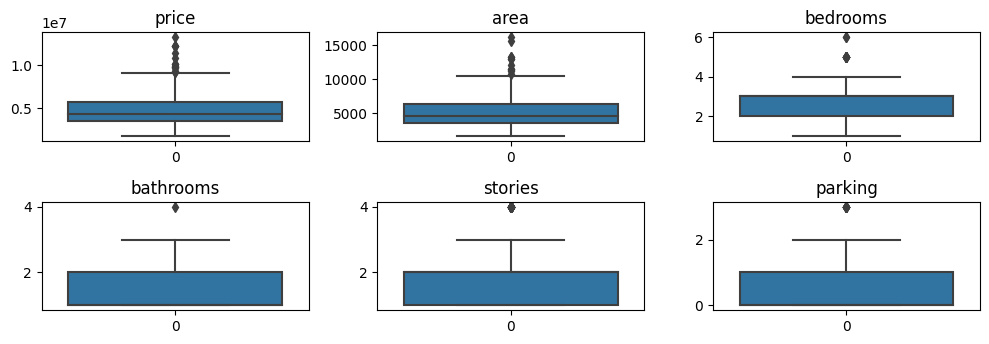

In [ ]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(10,5))

for i in numeric_features1.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()        #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 

Outliers are seen in the given dataset for price mostlty

In [ ]:
# outlier treatment for price
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)

In [ ]:
IQR = Q3 - Q1
IQR

2310000.0

In [ ]:
lower_limit= Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR

In [ ]:
df1=df[(df.price >lower_limit) & (df.price < upper_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa653dc89a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa653dc8dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa653dc8700>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa653dd8340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa653dd85e0>],
 'means': []}

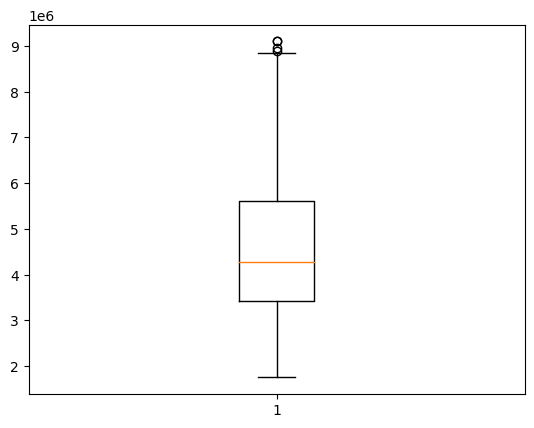

In [ ]:
plt.boxplot(df1.price)

#**Exploratorty Data Analysis**

In [ ]:
# Divide Data in categorical and numerical features
numeric_features= df1.select_dtypes(exclude='object')
categorical_features=df1.select_dtypes(include='object')

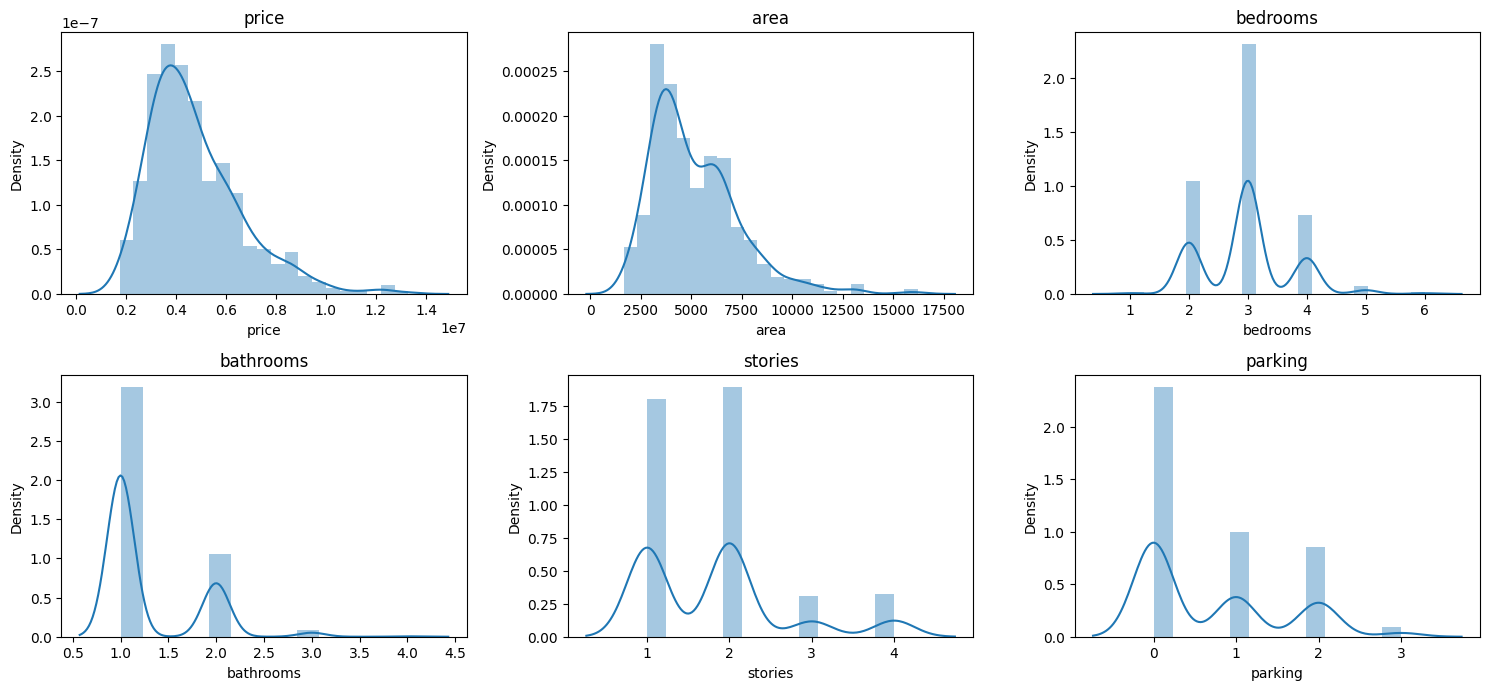

In [ ]:
# Distrubution of Numerical Data
n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()

In [ ]:
#y = df1['price']
#X = df1.drop('price', axis = 1)

In [ ]:
X = df1.drop(columns='price')
y = np.sqrt(df1['price'])

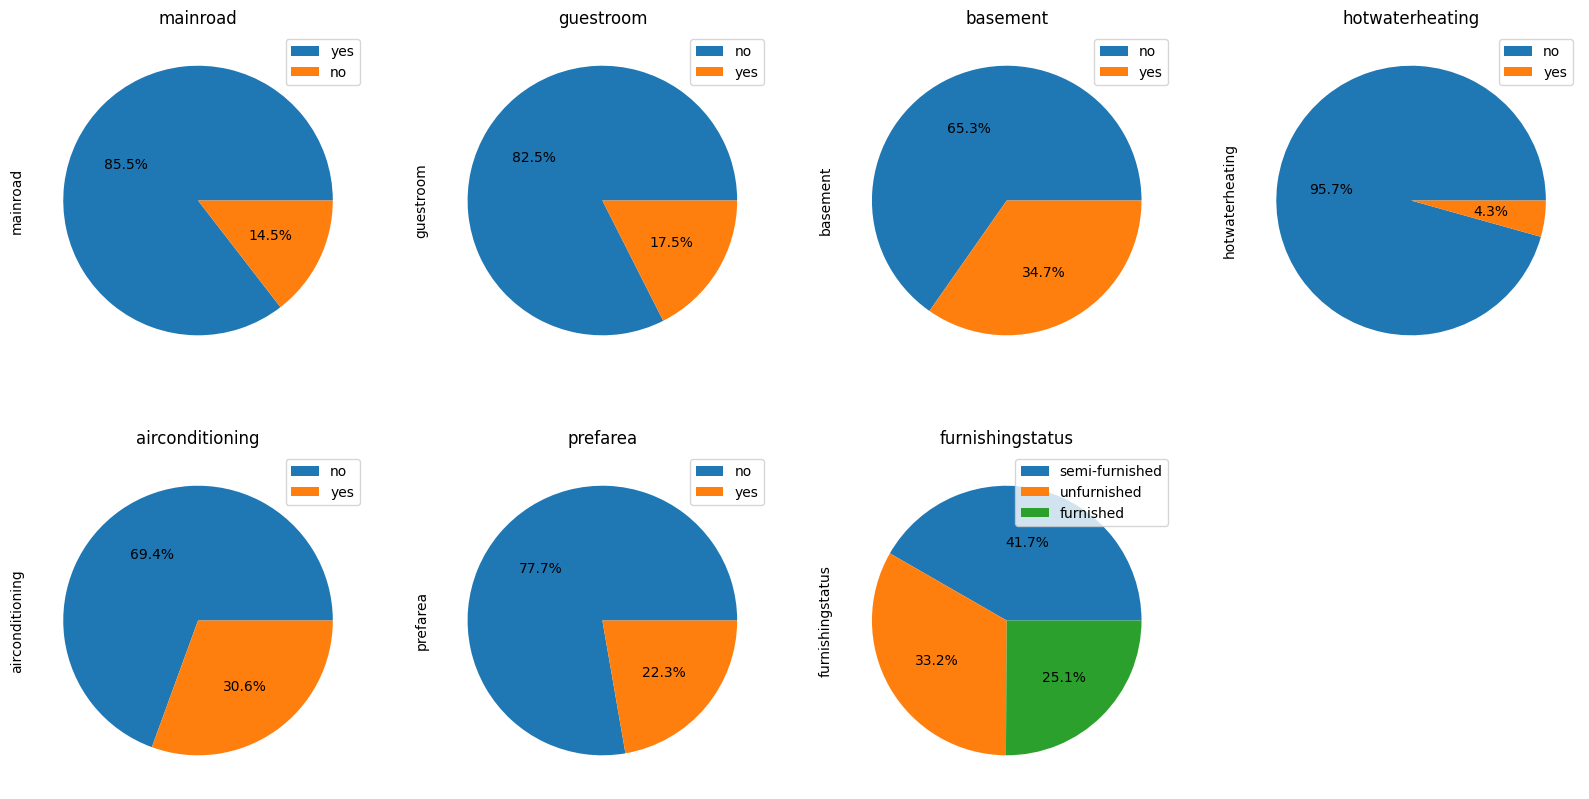

In [ ]:
# Visualization of Categorical Data
plt.figure(figsize=(20,10))
j=1
for i in categorical_features.columns:
  plt.subplot(2,4,j)
  j+= 1
  colors = ['turquoise','yellow']
  categorical_features[i].value_counts().plot.pie (autopct='%1.1f%%',labeldistance=None)
  plt.legend()
 
# plt.ylabel('')
  plt.title(i)

Converting categorical features into numerical features

In [ ]:
new_numerical =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function
df1[new_numerical] =df1[new_numerical].apply(binary_map)

In [ ]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


As furnishingstatus column have three classes, applying get_dummies for conversion into numerical features

In [ ]:
furnish_class = pd.get_dummies(df1['furnishingstatus'],drop_first=True) #Dropping first column to reduce categories


In [ ]:
furnish_class.head()

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0


In [ ]:
df1 = pd.concat([df1,furnish_class], axis = 1)

In [ ]:
df1.drop(['furnishingstatus'],axis=1,inplace=True)

In [ ]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [ ]:
# Correlation with price
df1.corr()['price']

price              1.000000
area               0.509856
bedrooms           0.332293
bathrooms          0.457962
stories            0.432528
mainroad           0.310712
guestroom          0.290195
basement           0.195705
hotwaterheating    0.082829
airconditioning    0.462342
parking            0.328308
prefarea           0.292536
semi-furnished     0.085865
unfurnished       -0.289439
Name: price, dtype: float64

In [ ]:
df1.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
price,1.000000,0.509856,0.332293,0.457962,0.432528,0.310712,0.290195,0.195705,0.082829,0.462342,0.328308,0.292536,0.085865,-0.289439
area,0.509856,1.000000,0.112056,0.133472,0.063939,0.289321,0.155552,0.037246,0.002533,0.211505,0.344797,0.212723,0.014346,-0.144573
bedrooms,0.332293,0.112056,1.000000,0.350025,0.404628,-0.024639,0.076559,0.100002,0.029208,0.146859,0.110234,0.066364,0.060348,-0.120973
bathrooms,0.457962,0.133472,0.350025,1.000000,0.308026,0.023649,0.147393,0.120375,0.040149,0.174966,0.127184,0.032021,0.020264,-0.128037
stories,0.432528,0.063939,0.404628,0.308026,1.000000,0.116551,0.038356,-0.166370,0.020024,0.281968,0.019222,0.026019,0.003122,-0.082920
mainroad,0.310712,0.289321,-0.024639,0.023649,0.116551,1.000000,0.091658,0.041974,-0.017305,0.099208,0.197896,0.194901,0.012027,-0.129950
guestroom,0.290195,0.155552,0.076559,0.147393,0.038356,0.091658,1.000000,0.372114,-0.025219,0.135385,0.030815,0.170439,0.012281,-0.104094
basement,0.195705,0.037246,0.100002,0.120375,-0.166370,0.041974,0.372114,1.000000,0.000294,0.040937,0.031970,0.228963,0.050443,-0.110257
hotwaterheating,0.082829,0.002533,0.029208,0.040149,0.020024,-0.017305,-0.025219,0.000294,1.000000,-0.121215,0.051929,-0.047207,0.064035,-0.051866
airconditioning,0.462342,0.211505,0.146859,0.174966,0.281968,0.099208,0.135385,0.040937,-0.121215,1.000000,0.128370,0.087934,-0.046109,-0.085191


<Axes: >

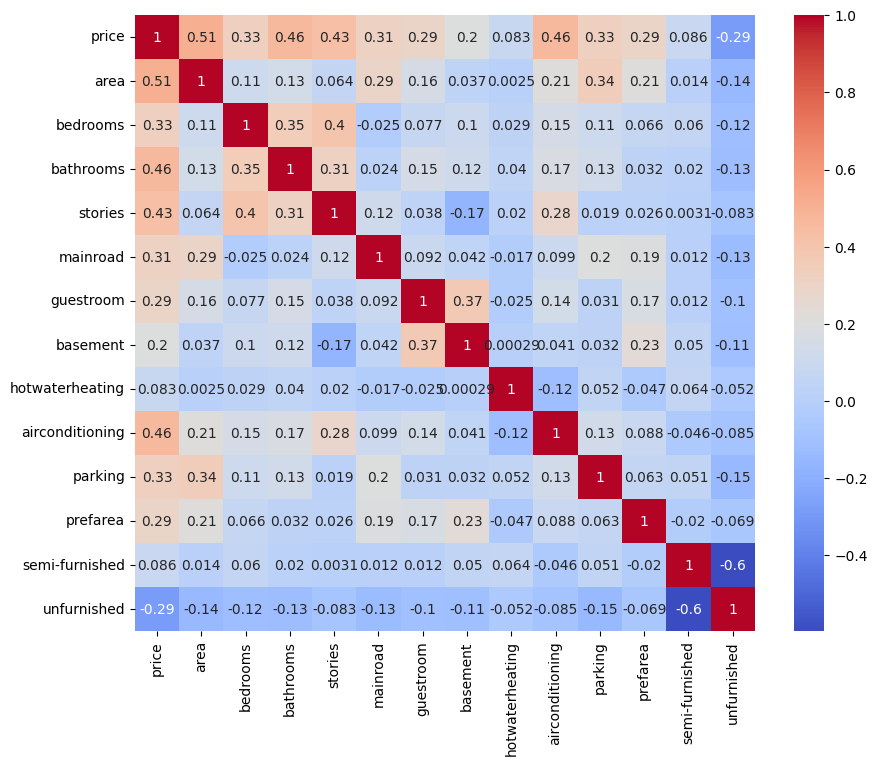

In [ ]:
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True)

There isnt as much multicollinearity within our independent varibales.Hence,keeping all the independent variables as it is.

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
# Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['price']]])

,variables,VIF
0,area,8.379515
1,bedrooms,16.807449
2,bathrooms,9.864603
3,stories,7.753724
4,mainroad,6.813814
5,guestroom,1.480199
6,basement,2.008344
7,hotwaterheating,1.077818
8,airconditioning,1.705877
9,parking,1.910532


#**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#y = df1['price']
#X = df1.drop('price', axis = 1)

In [ ]:
X = df1.drop(columns='price')
y = np.sqrt(df1['price'])

In [ ]:
#Splitting the data into train and test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)
print('Training data shape',X_train.shape)
print('Testing data shape',X_test.shape)

Training data shape (424, 13)
Testing data shape (106, 13)


In [ ]:
# Importing necessary libraries
from numpy import math
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Function to calculate score
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))

#**MODEL**

**1.Linear Regression**

In [ ]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predicting the Train set results

y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results

y_pred_test = regressor.predict(X_test)

In [ ]:
# r2 score of train set

r2_linear_train = r2_score(y_train, y_pred_train)

In [ ]:
r2_linear_train

0.6666196458720403

In [ ]:
r2_linear_test = r2_score(y_test, y_pred_test)

In [ ]:
# different metrics used

MSE  = mean_squared_error(y_test,y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(y_test,y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 39051.55796254346
RMSE : 197.6146704132653
R2 : 0.700537867666697
Adjusted R2 :  0.6582225663587302


**2.Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.8,1,10,20,40,80,100,300,700,1000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [ ]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.8}

Using  {'alpha': 0.8}  the negative mean squared error is:  -49051.32307424992


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
# Metrics used

MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_lasso_test = r2_score(y_test,y_pred_lasso)
print("R2 :" ,r2_lasso_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 38709.935502375716
RMSE : 196.74840660695506
R2 : 0.7031575580378957
Adjusted R2 :  0.6612124303693375


**3.Ridge Regression**

In [ ]:
# training model

from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [ ]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -48956.81771344195


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
#Metrics

MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_ridge_test = r2_score(y_test,y_pred_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 38551.04937382399
RMSE : 196.34421145993582
R2 : 0.7043759570298109
Adjusted R2 :  0.6612124303693375


**4.Elasticnet regularization**

In [ ]:
# training model

from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.606259746890452

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
#Metrics

MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elasticnet_test = r2_score(y_test,y_pred_en)
print("R2 :" ,r2_elasticnet_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 45762.54793956467
RMSE : 213.92182670210317
R2 : 0.649075455577689
Adjusted R2 :  0.5994882916919276


**5.Elasticnet CV**

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regularization = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regularization.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regularization.best_params_)
print("\nUsing ",elastic_regularization.best_params_, " the negative mean squared error is: ", elastic_regularization.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -48936.882577749275


In [ ]:
y_pred_elastic = elastic_regularization.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_elastic)
print("MSE :" , MSE)
  
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elastic_cv_test = r2_score(y_test, y_pred_elastic)
print("R2 :" ,r2_elastic_cv_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 38588.294633123456
RMSE : 196.4390354107947
R2 : 0.704090346279535
Adjusted R2 :  0.6622770256451216


#**Result**

In [ ]:
# creating a list of all model names

model_list = ['Linear regression','Lasso regression','Ridge regression','Elasticnet regularization','Elasticnet(cv) regressor']

In [ ]:
# creating a list of all model r2 score results from above

result_list = [r2_linear_test,r2_lasso_test,r2_ridge_test,r2_elasticnet_test,r2_elastic_cv_test]

In [ ]:
# creating an empty dataframe

results_df = pd.DataFrame()

In [ ]:
# adding above lists to the empty dataframe

results_df['model name'] = model_list
results_df['R2-score'] = result_list

In [ ]:
# dataframe containing results from all the above models used

results_df

,model name,R2-score
0,Linear regression,0.700538
1,Lasso regression,0.703158
2,Ridge regression,0.704376
3,Elasticnet regularization,0.649075
4,Elasticnet(cv) regressor,0.704090
